In [15]:
# Imports
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
# Parameters 
# DATASET_FILE_PATH: "BigData.xlsx",
# DATASET_SHEET_TITLE: "data_test",
# GRANULARITY: 10, # Take first item, skip next x, take next, skip x, take next, ...
# STEP_SIZE_SLIDING_WINDOW: 5,
# PAST_HISTORY: 20,
# FUTURE_TARGET: 1, 
# Looks at observations that are PASTHISTORY timesteps prior (reading only every STEP_SIZE_SLIDING_WINDOW entry),
# then predicts the result at FUTURETARGET timesteps in the future
# VAL_PERCENT: 0.1,
# TEST_PERCENT: 0.1,
# EPOCHS: 5,
# BATCH_SIZE: 10 # Splits the dataset into batches of this size: we perform gradiant descent once per batch
# SMOOTHING: 0

# runAll(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
#        FUTURE_TARGET, VAL_PERCENT, TEST_PERCENT, EPOCHS, BATCH_SPLITS_TRAIN, BATCH_SPLITS_VAL, SMOOTHING)

In [98]:
def run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, PAST_HISTORY, 
            FUTURE_TARGET, VAL_PERCENT, TEST_PERCENT, EPOCHS, BATCH_SPLITS, SMOOTHING, ATTEMPT_NAME, 
            SHUFFLE_BUFFER_SIZE, MEAN): 
    indexes, ground_truth, x_train, x_val, batched_train_data, batched_val_data, batched_test_data = process_data(
        DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, SMOOTHING, ATTEMPT_NAME, VAL_PERCENT, TEST_PERCENT, 
        PAST_HISTORY, FUTURE_TARGET, STEP_SIZE_SLIDING_WINDOW, BATCH_SPLITS, EPOCHS, SHUFFLE_BUFFER_SIZE, MEAN)
    model, training_history = run_lstm(x_train, x_val, batched_train_data, batched_val_data, 
                                       BATCH_SPLITS, EPOCHS, FUTURE_TARGET) 
    evaluate_results(model, training_history, indexes, ground_truth, batched_test_data)

In [139]:
# Load algorithm
%run ./data_management_component.ipynb

In [140]:
%run ./lstm_baseline.ipynb

In [141]:
%run ./evaluation_component.ipynb

1    0.399609
2    0.244922
3    0.244922
4    0.244922
5    0.476953
6    0.489844
7    0.244922
8    0.296484
Name: 0, dtype: float64
0    0.330322
Name: 0, dtype: float64
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________
Train for 554 steps, validate for 67 steps
Epoch 1/5
554/554 [==============================] - 6s 11ms/step - loss: 0.1818 - mae: 0.1818 - mape: 32.4310 - mse: 0.0714 - val_loss: 0.1128 - val_mae: 0.1128 - val_mape: 12.4301 - val_mse: 0.0187
Epoch 2/5
554/554 [==============================] - 4s 7ms/step - loss: 0.1192 - mae: 0.1192 - m

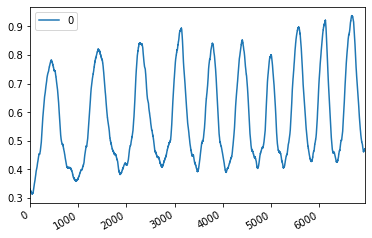

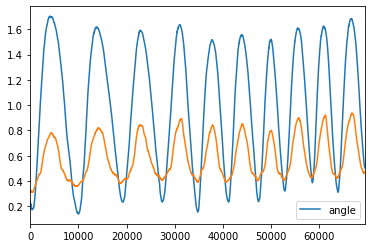

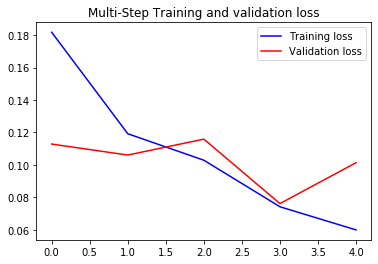

675/675 [==============================] - 3s 5ms/step - loss: 0.1096 - mae: 0.1096 - mape: 16.7150 - mse: 0.0182


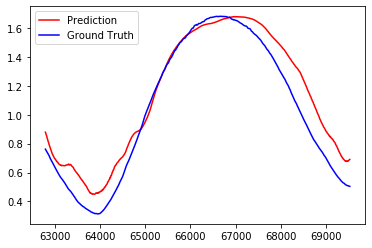

In [142]:
DATASET_FILE_PATH="Datasets\\BigData.xlsx"
DATASET_SHEET_TITLE="data_test"
GRANULARITY=10
STEP_SIZE_SLIDING_WINDOW=5
PAST_HISTORY=20
FUTURE_TARGET=1
VAL_PERCENT=0.1
TEST_PERCENT=0.1
EPOCHS=5
BATCH_SPLITS=10
SMOOTHING=50
ATTEMPT_NAME="LSTM_BASELINE"
SHUFFLE_BUFFER_SIZE=100
MEAN=True

# Running the algorithm all at once
BASELINE = run_all(DATASET_FILE_PATH, DATASET_SHEET_TITLE, GRANULARITY, STEP_SIZE_SLIDING_WINDOW, 
                   PAST_HISTORY, FUTURE_TARGET, VAL_PERCENT, TEST_PERCENT, EPOCHS, BATCH_SPLITS, 
                   SMOOTHING, ATTEMPT_NAME, SHUFFLE_BUFFER_SIZE, MEAN)

In [ ]:
# FUTURE WORKS:
# - Modify it such that I can import different sorts of MI algorithms